# Keyword Search

By Mohammed Muzamil Khan (https://github.com/mmkhan19). I will taking notes from the videos in order to keep track of the information rather tnan just running the code. My notes will be highlighted in <font color='blue'>blue.</font>

<font color='blue'></font>

<font color='blue'>TODO: Connect to a database and do a keyword search. </font>

## Setup

Load needed API keys and relevant Python libaries.

<font color='red'>Weaviate is an open source database. Keyword search capabilities along with vector search that rely on language models.</font>

In [1]:
# !pip install cohere
# !pip install weaviate-client

In [2]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

Let's start by importing Weaviate to access the Wikipedia database.

<font color='blue'>Has almost 10M entries (1M is in English and the rest in different languages.</font>

In [3]:
import weaviate
auth_config = weaviate.auth.AuthApiKey(
    api_key=os.environ['WEAVIATE_API_KEY'])



In [4]:
client = weaviate.Client(
    url=os.environ['WEAVIATE_API_URL'],
    auth_client_secret=auth_config,
    additional_headers={
        "X-Cohere-Api-Key": os.environ['COHERE_API_KEY'],
    }
)

In [5]:
client.is_ready() 

True

# Keyword Search

<font color='blue'>Every article in this database has some properties.<br/>
Returns: title, url, and text<br/>
BM25: Algorithm for keyword or lexical search; commonly used; it scores the documents in the archive based on the query; looks at the shared words in the query and the article.<br/>
Filter by: english language.<br/>
How many results: 3; default<br/></font>

In [6]:
def keyword_search(query,
                   results_lang='en',
                   properties = ["title","url","text"],
                   num_results=3):

    where_filter = {
    "path": ["lang"],
    "operator": "Equal",
    "valueString": results_lang
    }
    
    response = (
        client.query.get("Articles", properties)
        .with_bm25(
            query=query
        )
        .with_where(where_filter)
        .with_limit(num_results)
        .do()
        )

    result = response['data']['Get']['Articles']
    return result

In [7]:
query = "What is the most viewed televised event?"
keyword_search_results = keyword_search(query)
print(keyword_search_results)

[{'text': 'The most active Gamergate supporters or "Gamergaters" said that Gamergate was a movement for ethics in games journalism, for protecting the "gamer" identity, and for opposing "political correctness" in video games and that any harassment of women was done by others not affiliated with Gamergate. They argued that the close relationships between journalists and developers demonstrated a conspiracy among reviewers to focus on progressive social issues. Some supporters pointed to what they considered disproportionate praise for games such as "Depression Quest" and "Gone Home", which feature unconventional gameplay and stories with social implications, while they viewed traditional AAA games as downplayed. False claims of the "ethics in game journalism" had started as early as 2012, when Geoff Keighley was accused of such unethical behavior when he was presenting information about "Halo 4" among advertisements for Mountain Dew and Doritos, an event called "Doritosgate" in the gam

<font color='blue'>My query:</font>

In [8]:
query = "What is the most famous indian dish?"
keyword_search_results = keyword_search(query)
print(keyword_search_results)

[{'text': '"Malpua" is a popular sweet dish of Bihar, prepared by a mixture of "maida", milk, bananas, cashew nuts, peanuts, raisins, sugar, water, and green cardamom. Another notable sweet dish of Bihar is "balushahi", which is prepared by a specially treated combination of "maida" and sugar along with "ghee", and the other worldwide famous sweet, "khaja" is made from flour, vegetable fat, and sugar, which is mainly used in weddings and other occasions. Silao near Nalanda is famous for its production.', 'title': 'Indian cuisine', 'url': 'https://en.wikipedia.org/wiki?curid=227809'}, {'text': 'The most traditional dish from Monterrey is "cabrito", kid goat cooked on embers. Other local dishes and customs that perhaps date back to the Crypto-Judaism of Monterrey\'s founding families are the "semita" (bread without leavening), the capirotada dessert (a mix of cooked bread, cheese, raisins, peanuts, and crystallized sugarcane juice), and the relative absence of pork dishes. Another famous

### Try modifying the search options
- Other languages to try: `en, de, fr, es, it, ja, ar, zh, ko, hi`

In [9]:
properties = ["text", "title", "url", 
             "views", "lang"]

In [10]:
def print_result(result):
    """ Print results with colorful formatting """
    for i,item in enumerate(result):
        print(f'item {i}')
        for key in item.keys():
            print(f"{key}:{item.get(key)}")
            print()
        print()

In [11]:
print_result(keyword_search_results)

item 0
text:"Malpua" is a popular sweet dish of Bihar, prepared by a mixture of "maida", milk, bananas, cashew nuts, peanuts, raisins, sugar, water, and green cardamom. Another notable sweet dish of Bihar is "balushahi", which is prepared by a specially treated combination of "maida" and sugar along with "ghee", and the other worldwide famous sweet, "khaja" is made from flour, vegetable fat, and sugar, which is mainly used in weddings and other occasions. Silao near Nalanda is famous for its production.

title:Indian cuisine

url:https://en.wikipedia.org/wiki?curid=227809


item 1
text:The most traditional dish from Monterrey is "cabrito", kid goat cooked on embers. Other local dishes and customs that perhaps date back to the Crypto-Judaism of Monterrey's founding families are the "semita" (bread without leavening), the capirotada dessert (a mix of cooked bread, cheese, raisins, peanuts, and crystallized sugarcane juice), and the relative absence of pork dishes. Another famous local di

In [13]:
query = "What is the most famous indian dish?"
keyword_search_results = keyword_search(query, results_lang='hi')
print_result(keyword_search_results)

item 0
text:Alla Rakha Khan (born Allah Rakha Qureshi) was one of the most famous and widely recorded tabla players of the twentieth century. For tabla, ..Ustad Alla Rakha was such an artist, having brought his instrument a stature and respect never before enjoyed. He moved from Lahore to Bombay in the late 1940s and took full advantage of the opportunity to be in the public eye when Ravi Shankar retained him as his regular touring accompanist from around 1962 onwards. What he lacked in beauty of tone, Alla Rakha more than made up for it, with the most magically intuitive and natural sense of rhythm – an ability to play outside the beat while always remaining entirely cognizant of it. Rakha popularized the art of tabla, playing across the globe, elevating the status and respect of his instrument. Abbaji (as he was affectionately known by his disciples) also bridged the gap between Carnatic music and Hindustani music by playing with both renowned Carnatic musicians and other Hindustani 

<font color="blue">Key learning from this chapter:</font>

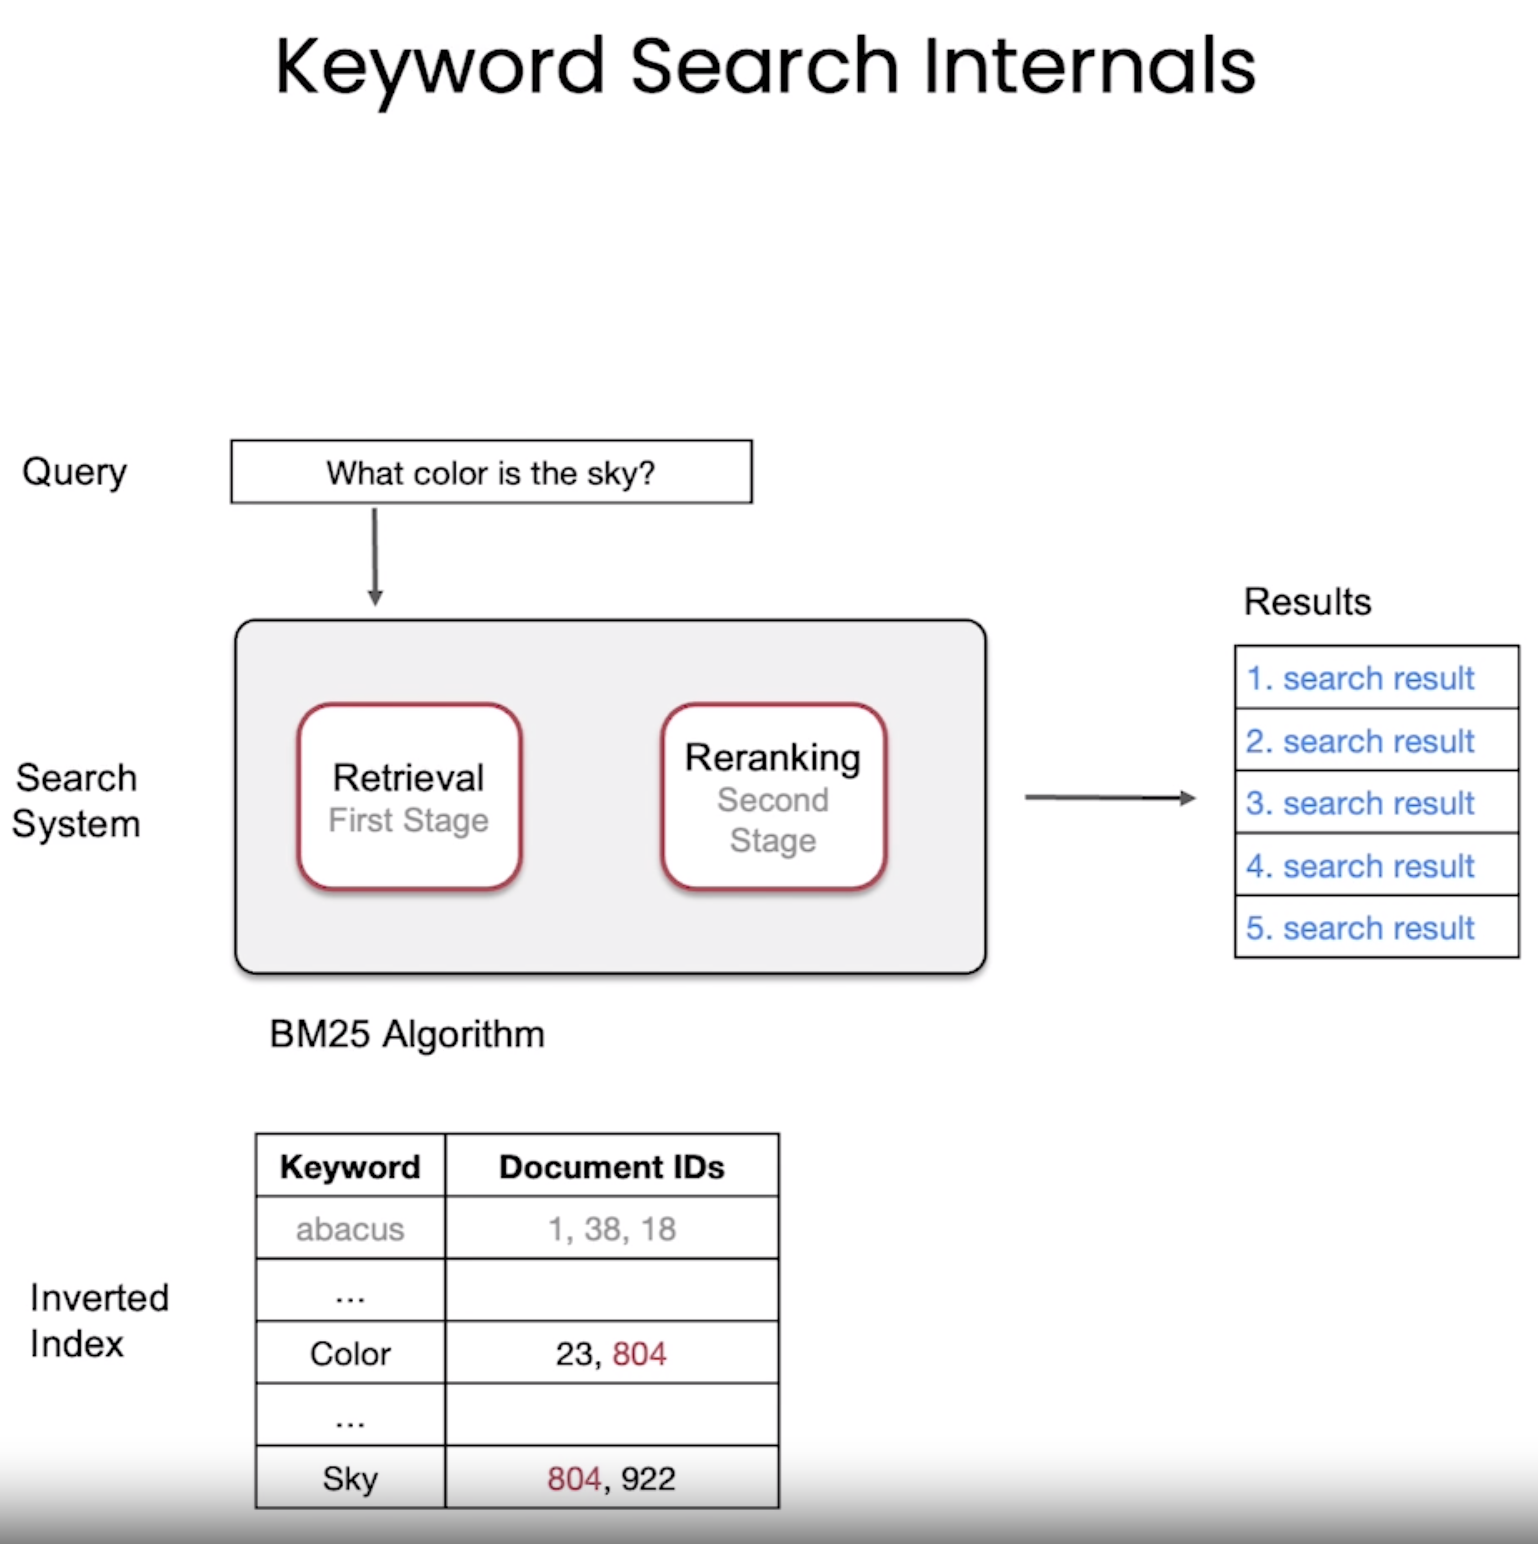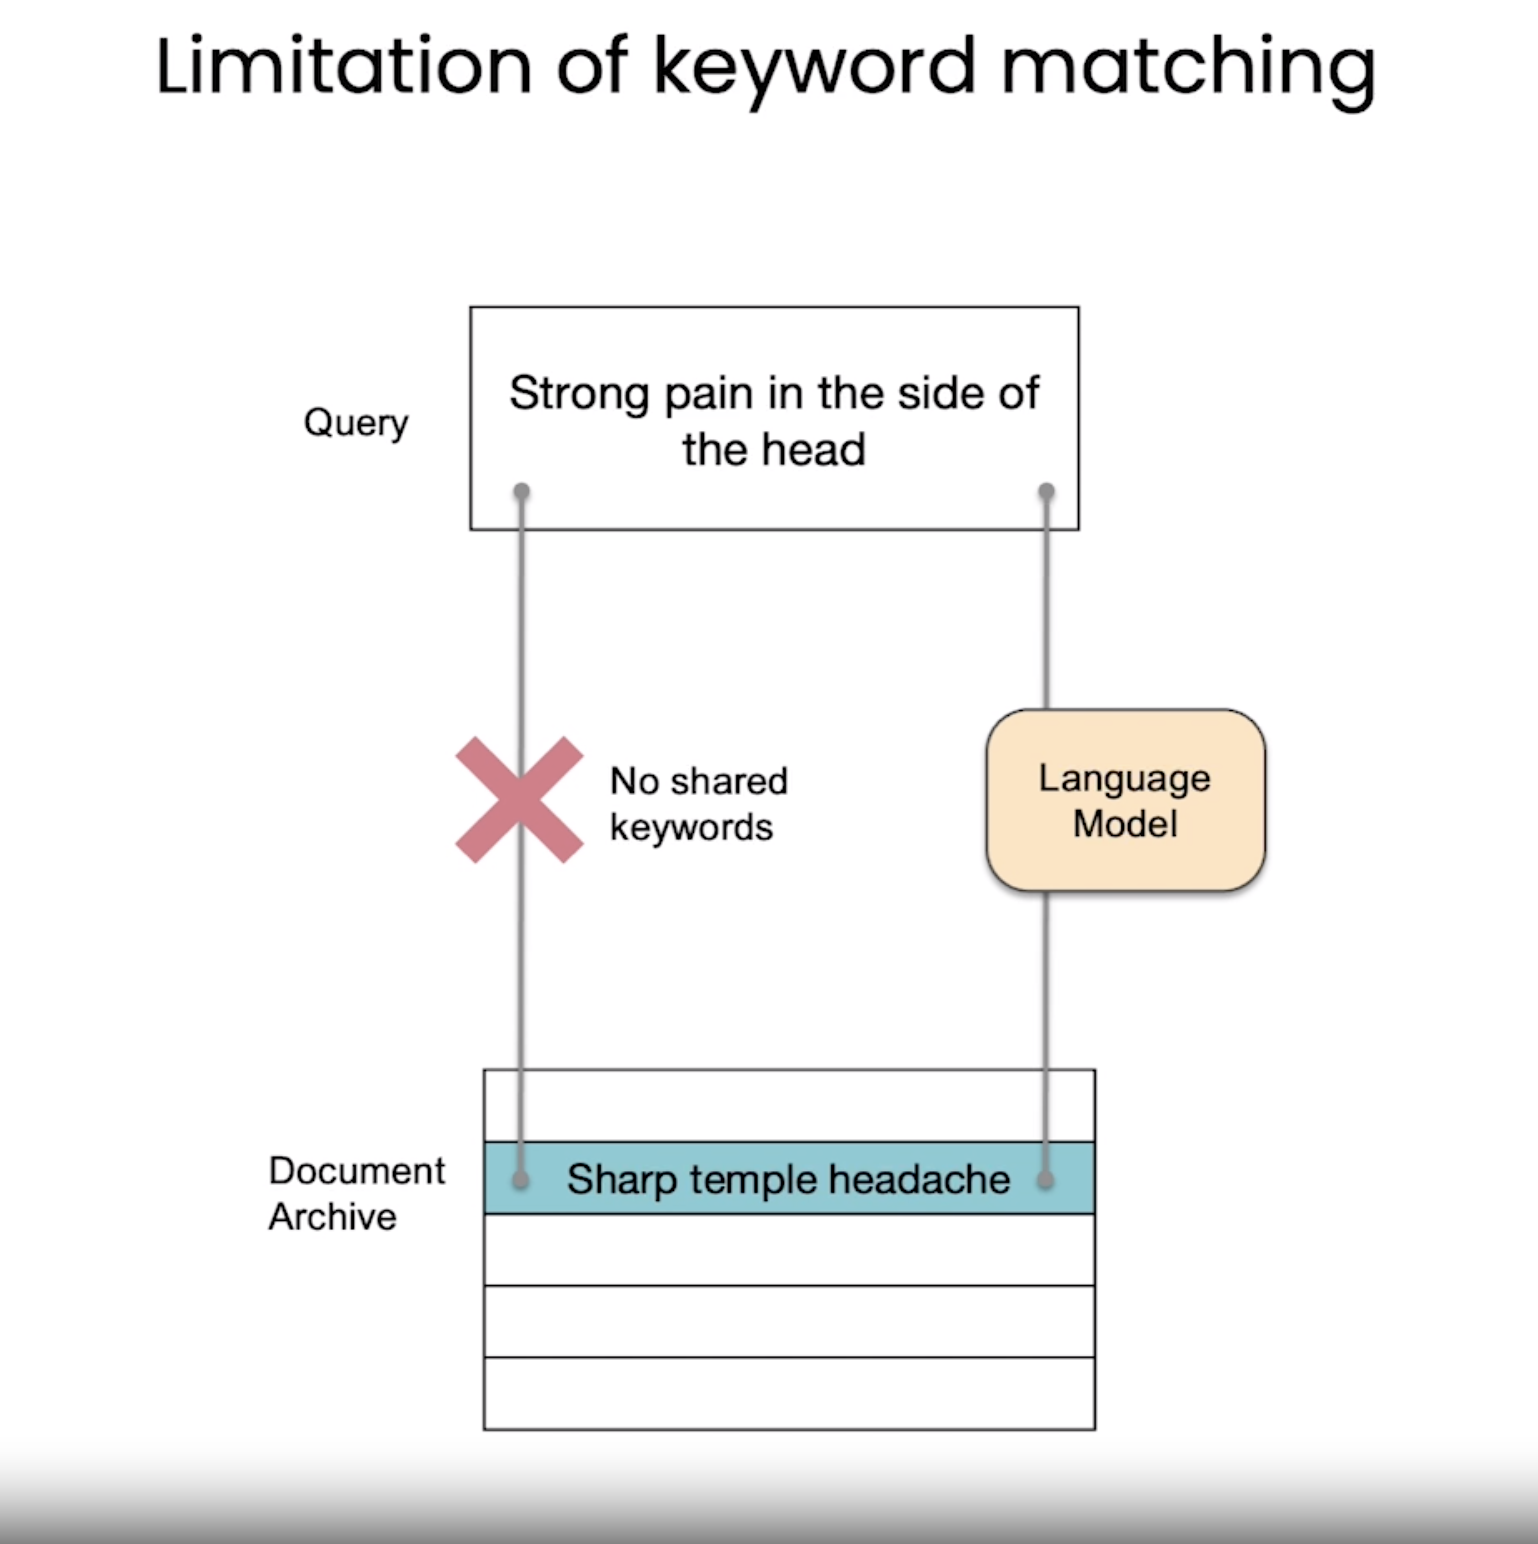

## How to get your own API key

For this course, an API key is provided for you.  If you would like to develop projects with Cohere's API outside of this classroom, you can register for an API key [here](https://dashboard.cohere.ai/welcome/register?utm_source=partner&utm_medium=website&utm_campaign=DeeplearningAI).